In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#kmeansを使うときにNaNがあると使えないので、あらかじめその行を消しておくか後で消したほうがいい
df = pd.read_csv('sample_data2.text', sep='|')

In [4]:
#このデータは５等級未満
df.head()

,Unnamed: 0,name,lii,bii,vmag,ra_deg,dec_deg,Unnamed: 7
0,NaN,HIP 32349,227.228158,-8.887796,-1.44,101.288541,-16.713143,NaN
1,NaN,HIP 30438,261.212145,-25.292266,-0.62,95.987878,-52.695718,NaN
2,NaN,HIP 69673,15.065575,69.111064,-0.05,213.918114,19.187270,NaN
3,NaN,HIP 71683,315.741874,-0.684330,-0.01,219.920410,-60.835147,NaN
4,NaN,HIP 91262,67.447332,19.237477,0.03,279.234108,38.782993,NaN


In [5]:
len(df.index)

1606

In [6]:
#もとのファイルでcolumnのスペースを消しておいた
df.columns

Index(['Unnamed: 0', 'name', 'lii', 'bii', 'vmag', 'ra_deg', 'dec_deg',
       'Unnamed: 7'],
      dtype='object')

In [7]:
#謎のcolumnを消す
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Unnamed: 7', axis = 1)

In [8]:
df.head()

,name,lii,bii,vmag,ra_deg,dec_deg
0,HIP 32349,227.228158,-8.887796,-1.44,101.288541,-16.713143
1,HIP 30438,261.212145,-25.292266,-0.62,95.987878,-52.695718
2,HIP 69673,15.065575,69.111064,-0.05,213.918114,19.187270
3,HIP 71683,315.741874,-0.684330,-0.01,219.920410,-60.835147
4,HIP 91262,67.447332,19.237477,0.03,279.234108,38.782993


In [9]:
df['lii'] = df['lii'].convert_objects(convert_numeric = True)
df['bii'] = df['bii'].convert_objects(convert_numeric = True)
df['vmag'] = df['vmag'].convert_objects(convert_numeric = True)
df['ra_deg'] = df['ra_deg'].convert_objects(convert_numeric = True)
df['dec_deg'] = df['dec_deg'].convert_objects(convert_numeric = True)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecate

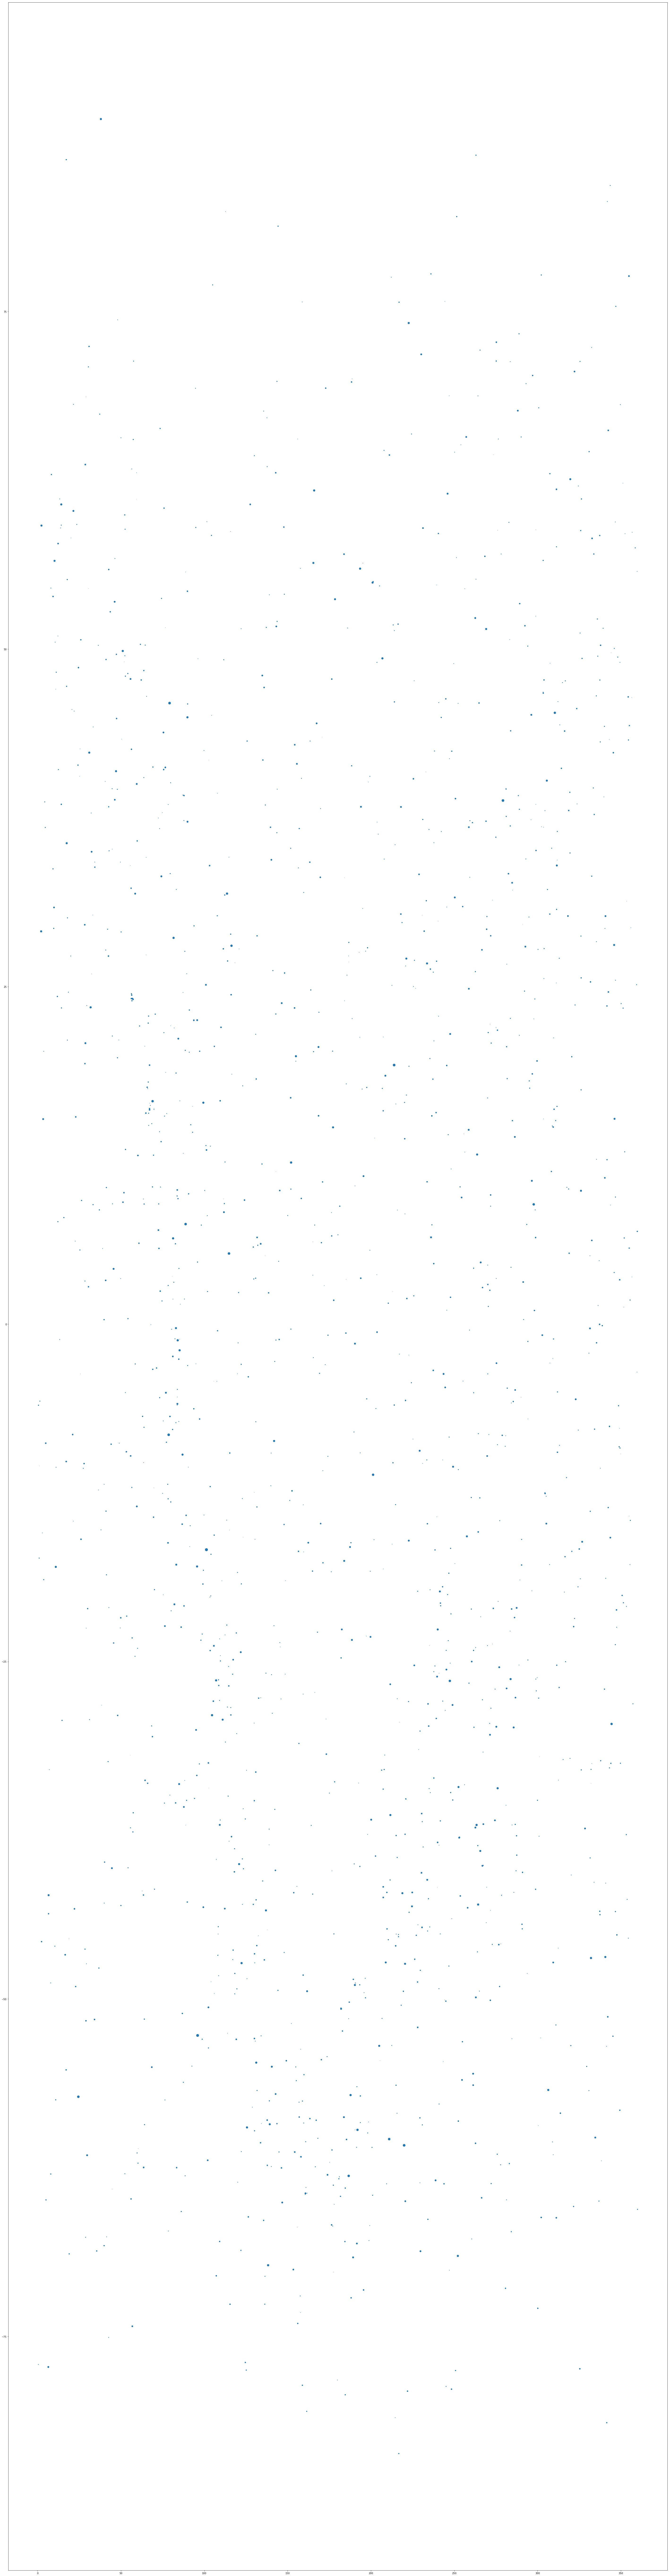

In [10]:
#vmagで星の明るさを表現してみた
plt.figure(figsize=(50, 200))
plt.scatter(df['ra_deg'], df['dec_deg'], s = ((-1)*df['vmag']+5)*20)

In [10]:
from sklearn.cluster import KMeans

In [11]:
#参考サイト（http://pythondatascience.plavox.info/scikit-learn/クラスタ分析-k-means）
arr = np.array([df['ra_deg'].tolist(),
               df['dec_deg'].tolist()], np.float32)
arr = arr.T

In [12]:
#kmeans法で88個にクラスタリング
km = KMeans(n_clusters=88).fit_predict(arr)
km

array([66, 42, 27, ..., 84, 62, 62], dtype=int32)

In [13]:
#クラスタ番号をdfに追加
df['cluster_id'] = km
df

,name,lii,bii,vmag,ra_deg,dec_deg,cluster_id
0,HIP 32349,227.228158,-8.887796,-1.44,101.288541,-16.713143,66
1,HIP 30438,261.212145,-25.292266,-0.62,95.987878,-52.695718,42
2,HIP 69673,15.065575,69.111064,-0.05,213.918114,19.187270,27
3,HIP 71683,315.741874,-0.684330,-0.01,219.920410,-60.835147,43
4,HIP 91262,67.447332,19.237477,0.03,279.234108,38.782993,64
5,HIP 24608,162.587511,4.566876,0.08,79.172065,45.999029,45
6,HIP 24436,209.241176,-25.245355,0.18,78.634464,-8.201639,0
7,HIP 37279,213.700721,13.022077,0.40,114.827242,5.227508,74
8,HIP 7588,290.841560,-58.792169,0.45,24.428132,-57.236660,11
9,HIP 27989,199.787219,-8.958678,0.45,88.792872,7.407036,38


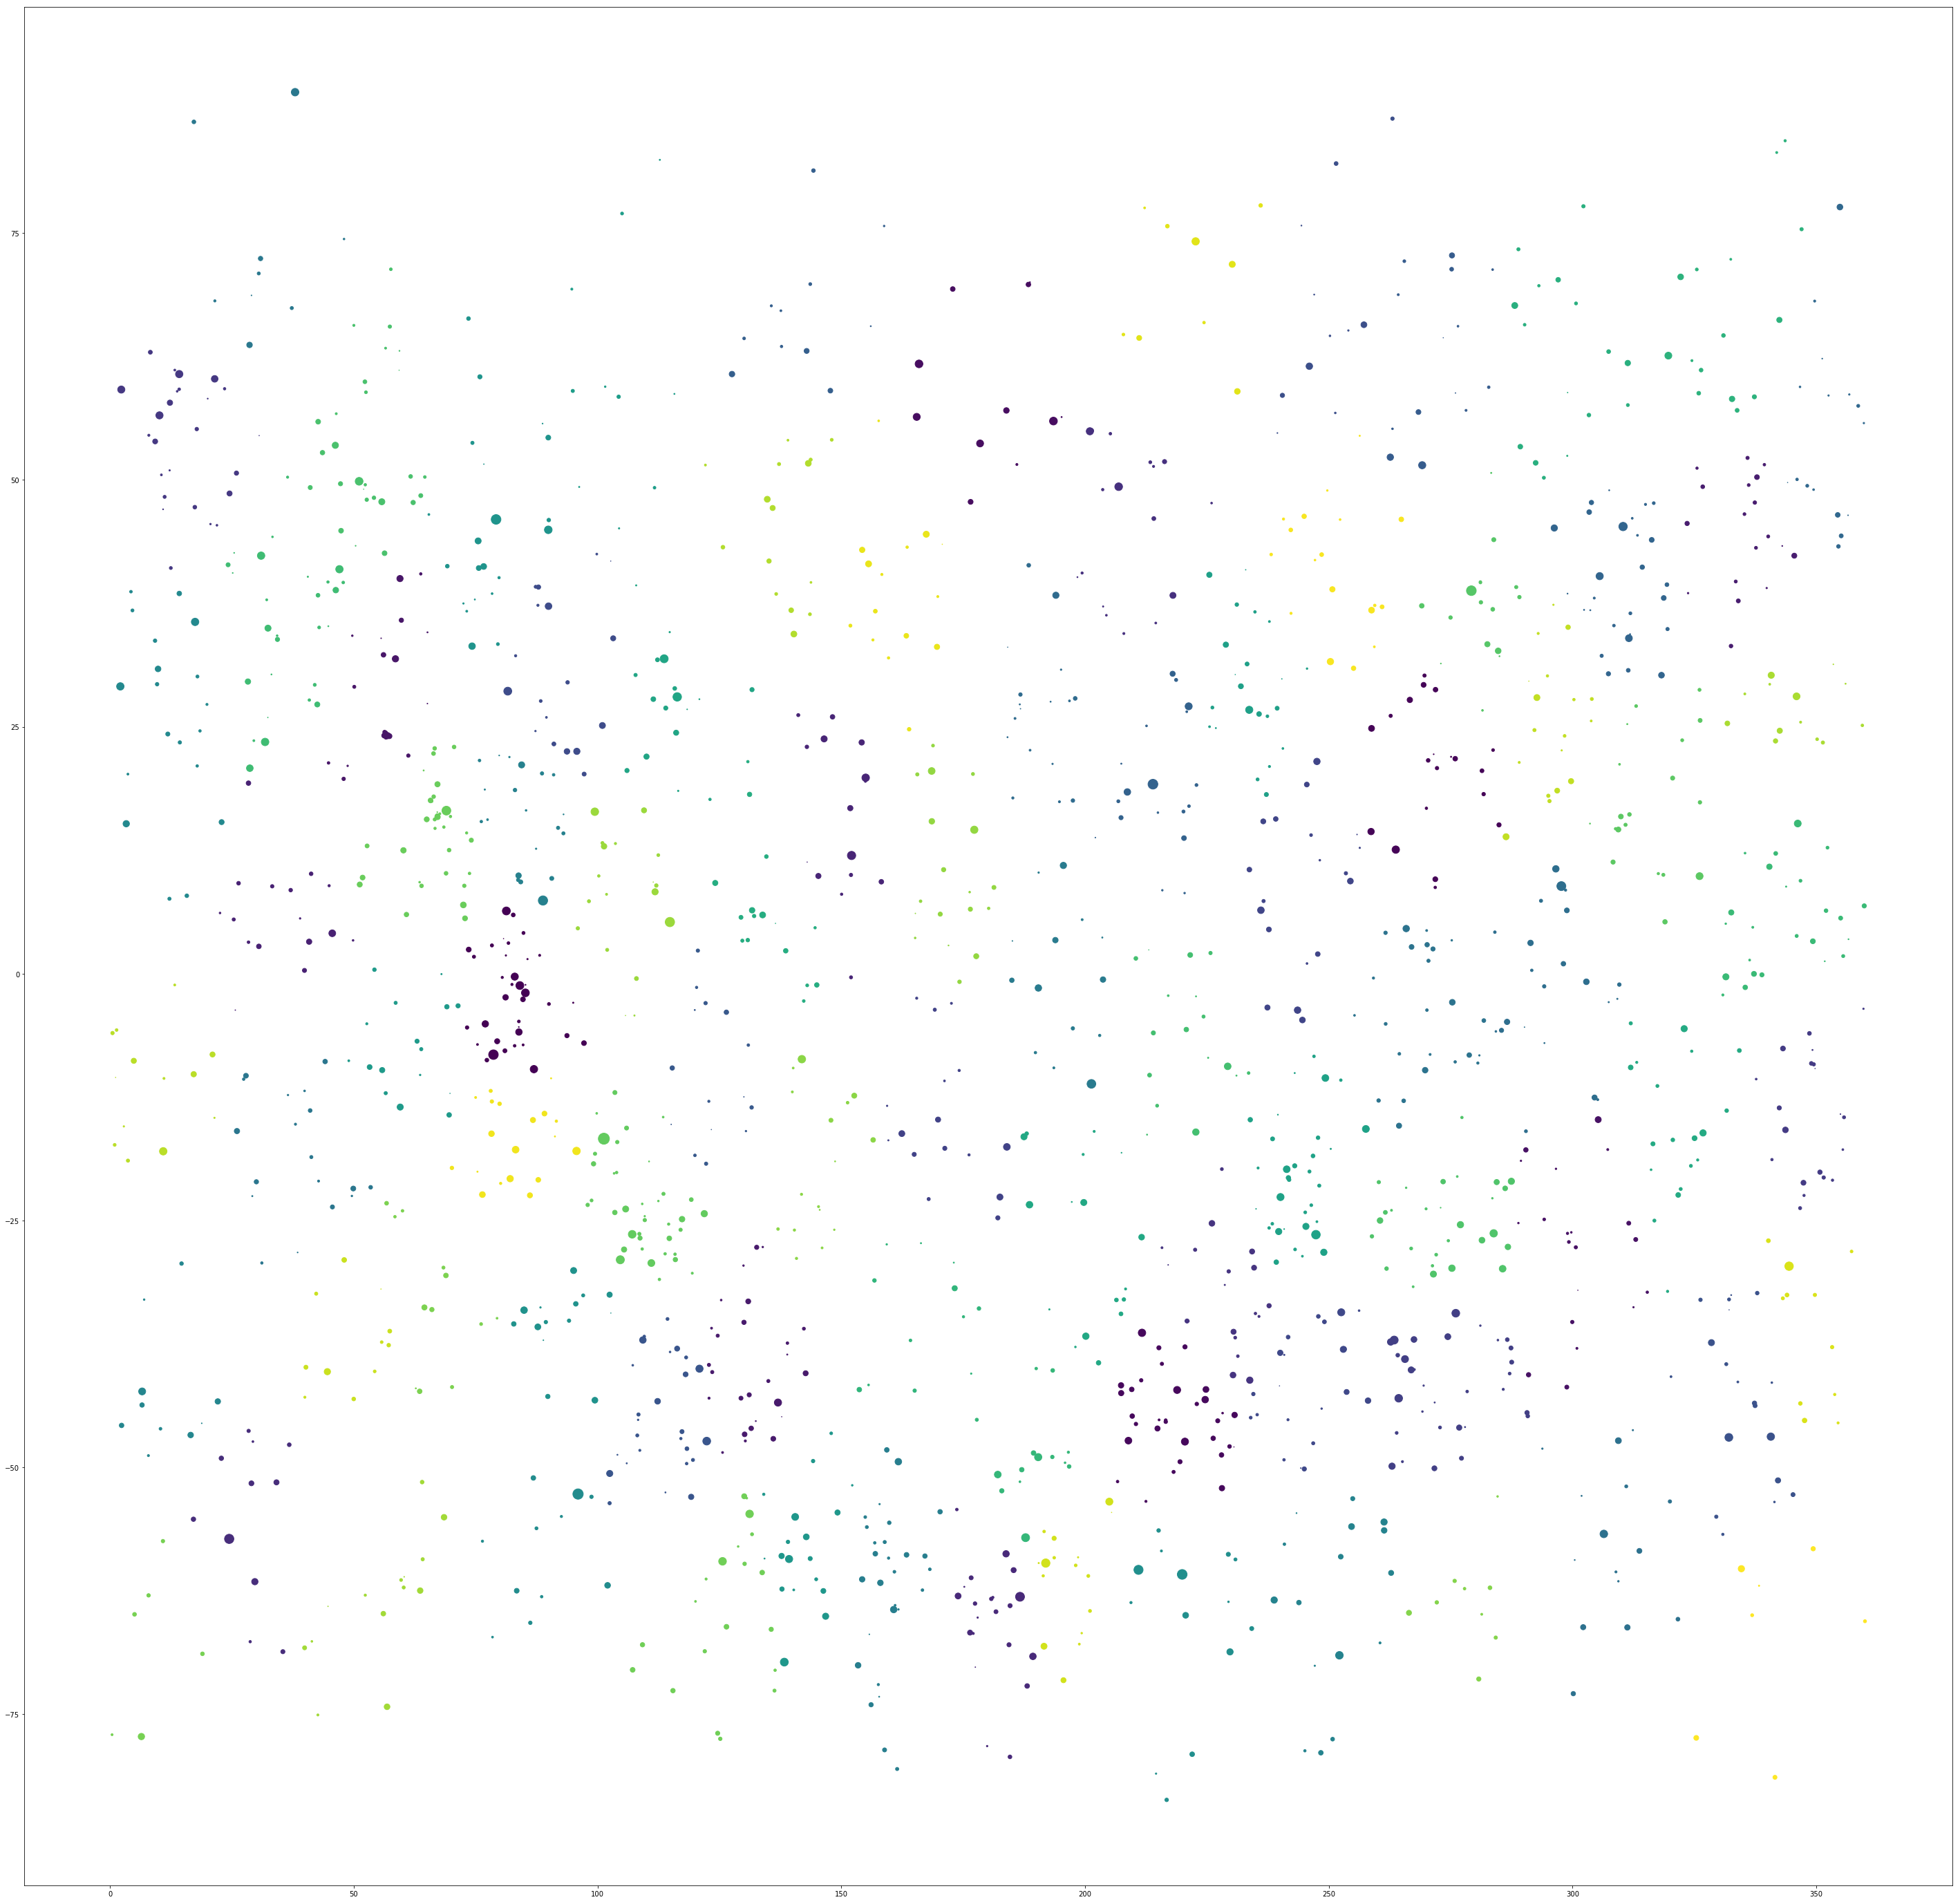

In [14]:
#クラスタリングしたものに色を付けて散布図を表示
plt.figure(figsize = (50, 50))
plt.scatter(df['ra_deg'], df['dec_deg'], s = ((-1)*df['vmag']+5)*40, c = df['cluster_id'])

In [15]:
stdf = df.sort_values(by = 'cluster_id')

In [16]:
stdf

,name,lii,bii,vmag,ra_deg,dec_deg,cluster_id
1033,HIP 25923,210.435608,-20.983039,4.62,82.982751,-7.301526,0
598,HIP 25247,209.981162,-22.981480,4.13,80.986818,-7.807956,0
31,HIP 26727,206.452177,-16.585177,1.74,85.189687,-1.942578,0
941,HIP 28413,209.786387,-12.828506,4.53,90.013939,-3.074077,0
1440,HIP 30093,211.972550,-8.336607,4.91,94.998352,-2.944490,0
1007,HIP 25473,200.087064,-17.219124,4.59,81.709284,3.095677,0
122,HIP 26241,209.522103,-19.583470,2.75,83.858255,-5.909900,0
1525,HIP 26736,205.712903,-16.185558,4.95,85.211316,-1.128786,0
1200,HIP 27750,204.409364,-12.222108,4.76,88.110178,1.855158,0
513,HIP 29651,214.404636,-10.978903,3.99,93.713902,-6.274727,0


In [45]:
'''特定のクラスタ番号だけを抽出したい'''

'特定のクラスタ番号だけを抽出したい'

In [46]:
'''こうすればいける -> df[df['cluster_id']==num]'''

"こうすればいける -> df[df['cluster_id']==num]"

In [17]:
import hdbscan

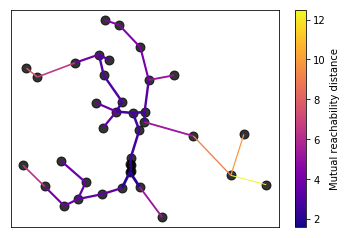

In [61]:
ra = np.array(df[df['cluster_id']==0]['ra_deg'])
dec = np.array(df[df['cluster_id']==0]['dec_deg'])
data = np.vstack((ra, dec))
data = data.T
clusterer = hdbscan.HDBSCAN(gen_min_span_tree=True)
clusterer.fit(data)
 
clusterer.minimum_spanning_tree_.plot(edge_cmap='plasma', #viridis, plasma, inferno, magma
                                      edge_alpha=1.0,
                                      node_size=80,
                                      edge_linewidth=1)